<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/Challenges-Kaggle/blob/main/Blood%20Cell%20Images/blood3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=f5dda6d9ac251cf594811932ca614d48ec0044f80f134a931b3306b1cc4237a6
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pathlib
import random
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
import zipfile
import io

In [ ]:
# pd.set_option('display.max_colwidth', None)

In [ ]:
zip_file_url = 'https://github.com/Mohammad-H-Zahrawi/Challenges-Kaggle/raw/main/Blood%20Cell%20Images/blood-cell-images-based-classification.zip'
response = requests.get(zip_file_url)
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall('/content/')

train = pd.read_csv('https://raw.githubusercontent.com/Mohammad-H-Zahrawi/Challenges-Kaggle/main/Blood%20Cell%20Images/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Mohammad-H-Zahrawi/Challenges-Kaggle/main/Blood%20Cell%20Images/test.csv')

In [ ]:
num_train_data = len(os.listdir('/content/drive/MyDrive/bloodCell/AllDataAugmentation'))
print('number of whole data is', num_train_data)
print('number of training data ', len(train))
print('number of testing data ', len(test))
print('number of unlabeled data', num_train_data - (len(train)+len(test)))

number of whole data is 4
number of training data  223
number of testing data  56
number of unlabeled data -275


In [ ]:
data_dir = pathlib.Path('/content/drive/MyDrive/bloodCell/AllDataAugmentation/EOSINOPHIL')

def view_random_image(target_dir):
  fig , axes = plt.subplots(2,3,figsize=(8, 8))
  for i,ax in enumerate(axes.flat):
    random_image = random.sample(os.listdir(data_dir),1)
    img = mpimg.imread(str(data_dir) + "/" + random_image[0])
    ax.imshow(img)
    ax.axis('off')

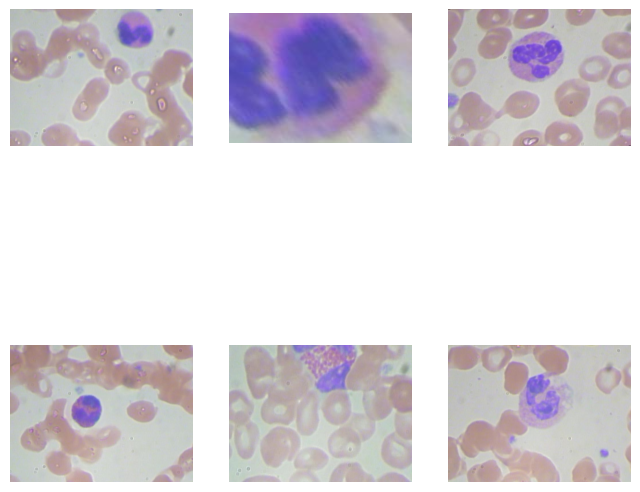

In [ ]:
view_random_image('Implant_data/train/')


In [ ]:
# list_images = os.listdir(data_dir)
# image_numbers = []         #extracting images numbers
# images_path = []           #extracting images pathes
# for i in list_images:
#     image_name = str(data_dir)+'/'+i
#     image_numbers.append(int(image_name[-7:-4]))
#     images_path.append(image_name)

In [ ]:
images_path[:5]

['/content/drive/MyDrive/bloodCell/AllDataAugmentation/EOSINOPHIL/BloodImage_00113.jpg',
 '/content/drive/MyDrive/bloodCell/AllDataAugmentation/EOSINOPHIL/BloodImage_00240.jpg',
 '/content/drive/MyDrive/bloodCell/AllDataAugmentation/EOSINOPHIL/BloodImage_00088.jpg',
 '/content/drive/MyDrive/bloodCell/AllDataAugmentation/EOSINOPHIL/BloodImage_00200.jpg',
 '/content/drive/MyDrive/bloodCell/AllDataAugmentation/EOSINOPHIL/BloodImage_00149.jpg']

In [ ]:
# #creating dataframe
# images = pd.DataFrame(columns=['image_path','Image'])
# images['image_path'] = images_path
# images['Image'] = image_numbers
# images.head(3)

In [ ]:
# train1 = pd.merge(train, images, on='Image')
# test1 = pd.merge(test, images, on='Image')

In [ ]:
len(test), len(test1), len(train), len(train1)

(56, 54, 223, 222)

In [ ]:
#this number exist on train but the image is missing
set(train['Image'])-set(train1['Image'])

{329}

In [ ]:
#these numbers exist on test but the images are missing
set(test['Image'])-set(test1['Image'])

{96, 116}

## Augmentation

In [ ]:
!pip install Augmentor

In [ ]:
import argparse
import Augmentor
import cv2

In [ ]:
train['Category'].value_counts()

Category
NEUTROPHIL    141
EOSINOPHIL     52
LYMPHOCYTE     18
MONOCYTE       12
Name: count, dtype: int64

In [ ]:
dataNeeded = [('EOSINOPHIL', 10), ('LYMPHOCYTE', 40), ('MONOCYTE', 40)]

In [ ]:
for classs, num in dataNeeded:
    x = Augmentor.Pipeline('/content/drive/MyDrive/bloodCell/AllDataAugmentation/'+classs)
    x.rotate(probability=0.5, max_left_rotation=25, max_right_rotation=25)
    # x.random_distortion(probability=0.3, grid_width=4, grid_height=4, magnitude=8)
    x.flip_left_right(probability=0.3)
    x.rotate180(probability=0.2)
    # x.crop_centre(0.2,0.4)
    x.shear(0.5,25,25)
    # x.crop_random(0.4,0.5)
    x.process()
    x.sample(num)

Initialised with 90 image(s) found.
Output directory set to /content/drive/MyDrive/bloodCell/AllDataAugmentation/EOSINOPHIL/output.

Processing <PIL.Image.Image image mode=RGB size=137x156 at 0x7DD45C75FF70>: 100%|██████████| 90/90 [00:06<00:00, 13.09 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=640x480 at 0x7DD45C75F5B0>: 100%|██████████| 10/10 [00:01<00:00,  6.07 Samples/s]


Initialised with 42 image(s) found.
Output directory set to /content/drive/MyDrive/bloodCell/AllDataAugmentation/LYMPHOCYTE/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=165x136 at 0x7DD45C6F3B20>: 100%|██████████| 42/42 [00:01<00:00, 24.55 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=640x480 at 0x7DD45C7192D0>: 100%|██████████| 40/40 [00:01<00:00, 21.41 Samples/s]


Initialised with 36 image(s) found.
Output directory set to /content/drive/MyDrive/bloodCell/AllDataAugmentation/MONOCYTE/output.

Processing <PIL.Image.Image image mode=RGB size=167x172 at 0x7DD45C71BDF0>: 100%|██████████| 36/36 [00:01<00:00, 25.64 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=317x224 at 0x7DD45C75F010>: 100%|██████████| 40/40 [00:01<00:00, 22.82 Samples/s]


In [ ]:
import shutil, sys


In [ ]:
for clas in ['LYMPHOCYTE', 'MONOCYTE', 'EOSINOPHIL']:
    print(clas)
    for i in os.listdir(os.path.join('/content/drive/MyDrive/bloodCell/AllDataAugmentation/', clas, 'output')):
        imgpath = os.path.join('/content/drive/MyDrive/bloodCell/AllDataAugmentation/', clas, 'output', i)
        shutil.move(imgpath ,'/content/drive/MyDrive/bloodCell/AllDataAugmentation/'+clas+'/' )

    if os.path.exists(os.path.join('/content/drive/MyDrive/bloodCell/AllDataAugmentation/', clas, 'output')):
        os.rmdir(os.path.join('/content/drive/MyDrive/bloodCell/AllDataAugmentation/', clas, 'output'))


LYMPHOCYTE
MONOCYTE
EOSINOPHIL


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames, in os.walk('/content/dataImages/train'):
  print('There are ',len(dirnames), 'directories and ', len(filenames), 'images in',dirpath)

In [ ]:
data_aggmented = pd.DataFrame(columns=['image_path','Category'])
for clas in os.listdir('/content/drive/MyDrive/bloodCell/AllDataAugmentation'):
    for i in os.listdir(os.path.join('/content/drive/MyDrive/bloodCell/AllDataAugmentation/', clas)):
        imgpath = os.path.join('/content/drive/MyDrive/bloodCell/AllDataAugmentation/', clas, i)
        new_row = {'image_path': imgpath, 'Category': clas}
        data_aggmented = pd.concat([data_aggmented, pd.DataFrame([new_row])], ignore_index=True)

    # if os.path.exists(os.path.join('/content/dataImages/train/', clas, 'output')):
    #     os.rmdir(os.path.join('/content/dataImages/train/', clas, 'output'))

(480, 640, 3)


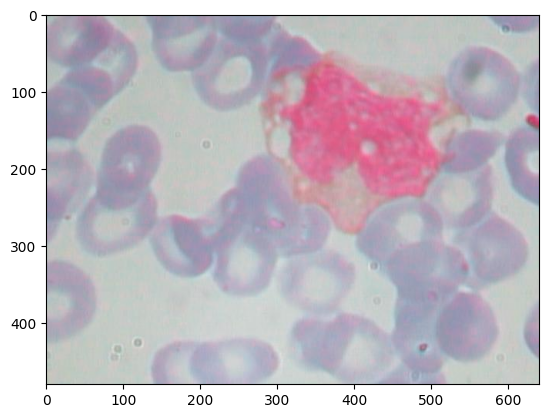

In [ ]:
img  = cv2.imread(data_aggmented['image_path'][2])
print(img.shape)
plt.imshow(img)


In [ ]:
img = Image.open(data_aggmented['image_path'][160])
img = img.resize((640,640))

In [ ]:
data_aggmented['image_path'][161]

'/content/drive/MyDrive/bloodCell/AllDataAugmentation/EOSINOPHIL/BloodImage_00108.jpg'

In [ ]:
def image_to_array(x):
    img = Image.open(x)
    img = img.resize((150,150))
    img = np.array(img)/255.0  # this number is 200x200x3
    return img

data_aggmented['image_array'] = data_aggmented['image_path'].apply(image_to_array)


In [ ]:
data_aggmented['image_array'][4].shape

(150, 150, 3)

In [ ]:
data_aggmented = data_aggmented.iloc[np.random.permutation(data_aggmented.index)].reset_index(drop=True)

In [ ]:
data_aggmented['Category']

0      EOSINOPHIL
1      EOSINOPHIL
2      LYMPHOCYTE
3        MONOCYTE
4      NEUTROPHIL
          ...    
624      MONOCYTE
625    NEUTROPHIL
626      MONOCYTE
627    NEUTROPHIL
628      MONOCYTE
Name: Category, Length: 629, dtype: object

In [ ]:
images_train_augmented=[]
for i in data_aggmented['image_array']:
    images_train_augmented.append(i.reshape(67500,))

In [ ]:
images_train_augmented = np.array(images_train_augmented)
images_train_augmented.shape

(629, 67500)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(y)
label_encoder.classes_

array(['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'], dtype=object)

In [ ]:
label_encoder.inverse_transform([2])[0]

'MONOCYTE'

In [ ]:
data_dir_test = pathlib.Path('/content/Images/Images')
list_images = os.listdir(data_dir_test)
image_numbers = []         #extracting images numbers
images_path = []           #extracting images pathes
for i in list_images:
    image_name = str(data_dir_test)+'/'+i
    image_numbers.append(int(image_name[-7:-4]))
    images_path.append(image_name)
images = pd.DataFrame(columns=['image_path','Image'])
images['image_path'] = images_path
images['Image'] = image_numbers
images.head(3)
train1 = pd.merge(train, images, on='Image')
test1 = pd.merge(test, images, on='Image')



In [ ]:
test1['image_array'] = test1['image_path'].apply(image_to_array)

In [ ]:
images_test=[]
for i in test1['image_array']:
    images_test.append(i.reshape(67500,))

images_test = np.array(images_test)
images_test.shape

(54, 67500)

# xgboost normal

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_train_augmented, train_labels_encoded, test_size=0.2, random_state=42)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4 , tree_method='gpu_hist',
                              n_estimators=200,  learning_rate=0.05,  max_depth=6,)


In [ ]:
xgb_model.fit(X_train, y_train, )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [ ]:
pred = xgb_model.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, pred, average='micro')

0.5873015873015873

In [ ]:
test_pred = xgb_model.predict(images_test)
test1['Category'] = label_encoder.inverse_transform(test_pred)

In [ ]:
s = test1[['Image','Category']]
true = pd.read_csv('/content/dontopenme.csv')

In [ ]:
final = pd.merge(s, true, on='Image')


In [ ]:
final['fuck'] = final['Category_x'] == final['Category_y']

In [ ]:
final['fuck'].value_counts()

fuck
False    31
True     23
Name: count, dtype: int64

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model


In [ ]:
model = VGG16()
print(model.summary())

553467096/553467096 [==============================] - 18s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [ ]:
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [ ]:
features={}
for clas in os.listdir('/content/drive/MyDrive/bloodCell/AllDataAugmentation'):
    print(clas)
    for image in os.listdir(os.path.join('/content/drive/MyDrive/bloodCell/AllDataAugmentation/', clas)):
        imagepath= os.path.join('/content/drive/MyDrive/bloodCell/AllDataAugmentation/', clas, image)

        img = load_img(imagepath, target_size=(224,224))
        img = img_to_array(img)
        expanded_img_array = np.expand_dims(img, axis=0)

        img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        feature = model.predict(img, verbose=0)
        features[imagepath]=feature

MONOCYTE
EOSINOPHIL
LYMPHOCYTE
NEUTROPHIL


In [ ]:
features.keys()

dict_keys(['/content/drive/MyDrive/bloodCell/AllDataAugmentation/MONOCYTE/BloodImage_00335.jpg', '/content/drive/MyDrive/bloodCell/AllDataAugmentation/MONOCYTE/BloodImage_00225.jpg', '/content/drive/MyDrive/bloodCell/AllDataAugmentation/MONOCYTE/BloodImage_00255.jpg', '/content/drive/MyDrive/bloodCell/AllDataAugmentation/MONOCYTE/BloodImage_00171.jpg', '/content/drive/MyDrive/bloodCell/AllDataAugmentation/MONOCYTE/BloodImage_00281.jpg', '/content/drive/MyDrive/bloodCell/AllDataAugmentation/MONOCYTE/BloodImage_00985.jpg', '/content/drive/MyDrive/bloodCell/AllDataAugmentation/MONOCYTE/BloodImage_00015.jpg', '/content/drive/MyDrive/bloodCell/AllDataAugmentation/MONOCYTE/BloodImage_00040.jpg', '/content/drive/MyDrive/bloodCell/AllDataAugmentation/MONOCYTE/BloodImage_00127.jpg', '/content/drive/MyDrive/bloodCell/AllDataAugmentation/MONOCYTE/BloodImage_00110.jpg', '/content/drive/MyDrive/bloodCell/AllDataAugmentation/MONOCYTE/BloodImage_00196.jpg', '/content/drive/MyDrive/bloodCell/AllDataAu

In [ ]:
pd.DataFrame(features)

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
features['/content/drive/MyDrive/bloodCell/AllDataAugmentation/EOSINOPHIL/BloodImage_00041.jpg'][0]

array([0.       , 0.       , 0.       , ..., 0.       , 2.2578778,
       1.1200962], dtype=float32)

In [ ]:
df = pd.DataFrame.from_dict({k: v.flatten() for k, v in features.items()}, orient='index')


In [ ]:
classes=[]
for clas in os.listdir('/content/drive/MyDrive/bloodCell/AllDataAugmentation'):
    print(clas)
    for image in os.listdir(os.path.join('/content/drive/MyDrive/bloodCell/AllDataAugmentation/', clas)):
        classes.append(clas)

MONOCYTE
EOSINOPHIL
LYMPHOCYTE
NEUTROPHIL


In [ ]:
df['Category'] = classes

In [ ]:
df.sample(frac=1)

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Category
/content/drive/MyDrive/bloodCell/AllDataAugmentation/LYMPHOCYTE/LYMPHOCYTE_original_BloodImage_00157.jpg_a2cee690-55e9-44f1-8ca5-b327e35647e6.jpg,0.0,0.0,0.000000,0.000000,0.000000,0.0,6.510467,0.0,0.0,2.149885,...,0.884817,0.417450,0.0,0.094490,0.358506,0.000000,0.000000,1.130335,0.359869,LYMPHOCYTE
/content/drive/MyDrive/bloodCell/AllDataAugmentation/LYMPHOCYTE/BloodImage_00157.jpg,0.0,0.0,0.000000,0.000000,0.000000,0.0,5.874919,0.0,0.0,1.587834,...,0.000000,0.447831,0.0,0.961057,0.000000,0.000000,0.000000,0.909871,1.000196,LYMPHOCYTE
/content/drive/MyDrive/bloodCell/AllDataAugmentation/NEUTROPHIL/BloodImage_00979.jpg,0.0,0.0,0.904028,3.858286,0.000000,0.0,2.004185,0.0,0.0,4.318129,...,4.512552,0.000000,0.0,0.000000,0.103618,0.000000,0.000000,4.874643,0.000000,NEUTROPHIL
/content/drive/MyDrive/bloodCell/AllDataAugmentation/NEUTROPHIL/BloodImage_00339.jpg,0.0,0.0,0.000000,1.871066,0.000000,0.0,0.904706,0.0,0.0,1.088571,...,2.808350,0.547066,0.0,0.000000,1.408623,0.000000,0.000000,2.011239,0.000000,NEUTROPHIL
/content/drive/MyDrive/bloodCell/AllDataAugmentation/NEUTROPHIL/BloodImage_00379.jpg,0.0,0.0,0.000000,2.428276,0.000000,0.0,0.000000,0.0,0.0,0.446650,...,3.482953,0.832692,0.0,0.000000,0.324677,0.129076,0.000000,1.854062,0.000000,NEUTROPHIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/content/drive/MyDrive/bloodCell/AllDataAugmentation/LYMPHOCYTE/LYMPHOCYTE_original_BloodImage_00021.jpg_37d8bf26-328d-4f1d-b6fd-ba443ac53402.jpg,0.0,0.0,0.000000,0.000000,0.000000,0.0,6.242452,0.0,0.0,3.595477,...,2.675757,0.990702,0.0,0.276052,1.180864,0.000000,0.000000,2.222067,1.513900,LYMPHOCYTE
/content/drive/MyDrive/bloodCell/AllDataAugmentation/MONOCYTE/MONOCYTE_original_augBloodImage_00278.jpg_81b2a9b3-4072-4c4f-a04a-aed81364a6ad.jpg,0.0,0.0,0.000000,0.000000,2.006966,0.0,1.144008,0.0,0.0,1.627136,...,0.546288,5.301747,0.0,1.474142,0.419405,0.000000,1.450475,0.000000,0.000000,MONOCYTE
/content/drive/MyDrive/bloodCell/AllDataAugmentation/LYMPHOCYTE/LYMPHOCYTE_original_BloodImage_00217.jpg_b57aeba6-3a4e-4970-acbb-30af15978ca1.jpg,0.0,0.0,0.000000,0.308305,0.000000,0.0,1.571203,0.0,0.0,0.322832,...,1.779714,0.994184,0.0,0.000000,1.526742,0.000000,0.000000,1.458645,1.250312,LYMPHOCYTE
/content/drive/MyDrive/bloodCell/AllDataAugmentation/NEUTROPHIL/BloodImage_00391.jpg,0.0,0.0,0.000000,1.397848,0.000000,0.0,1.471139,0.0,0.0,0.858971,...,1.553413,0.517782,0.0,0.000000,0.668342,0.000000,0.000000,1.386224,0.506292,NEUTROPHIL


In [ ]:
X=df.drop('Category',axis=1)
y=df['Category']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, train_labels_encoded, test_size=0.2, random_state=42)